In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from plots import histogram
from loss import moment_matching_loss
from stock_price_handler import load_stock_prices, get_log_returns
from sde import BlackScholes

In [2]:
TIME_INCREMENT = 5
STOCK_NAME = "apple"

In [3]:
stock_prices = load_stock_prices(STOCK_NAME)
actual_log_returns = get_log_returns(stock_prices)

In [4]:
sigma = np.std(actual_log_returns) / np.sqrt(TIME_INCREMENT) / 2
mu = np.mean(actual_log_returns) / TIME_INCREMENT + np.square(sigma) / 2
initial_states = torch.tensor(np.array(stock_prices))

In [5]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [6]:
black_scholes = BlackScholes(mu=mu, sigma=sigma, sample_size=len(stock_prices), times=torch.linspace(0, TIME_INCREMENT, 5))
optimizer = torch.optim.SGD(black_scholes.parameters(), lr=learning_rate)

In [7]:
def train_loop(model, loss_function, optimizer, num_epochs):

    model.train()
    for epoch in range(num_epochs):

        estimated_log_returns = model(initial_states)
        loss = loss_function(estimated_log_returns, torch.tensor(actual_log_returns))

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        print(f"Epoch {epoch}: Loss = {loss.item():>.7f}")
        if not epoch % 10 or epoch == num_epochs - 1:
            histogram(actual_log_returns, label="Actual", color="black")
            histogram(estimated_log_returns.detach().numpy(), label="Black Scholes", color="orange")
            plt.title(f"Epoch {epoch}: Loss = {loss.item():>.7f}")
            plt.legend()
            plt.show()


Epoch 0: Loss = 0.0007672


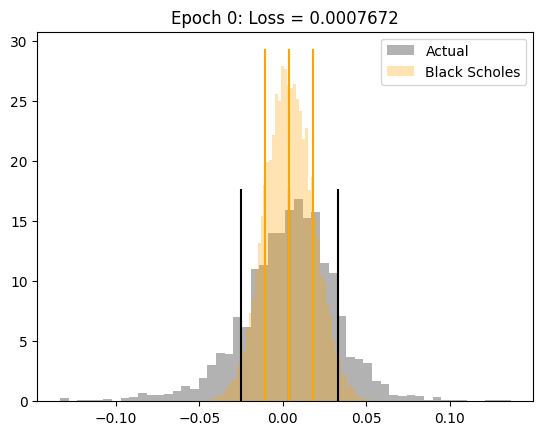

Epoch 1: Loss = 0.0007247
Epoch 2: Loss = 0.0006913
Epoch 3: Loss = 0.0006566
Epoch 4: Loss = 0.0006424
Epoch 5: Loss = 0.0006063
Epoch 6: Loss = 0.0005950
Epoch 7: Loss = 0.0005872
Epoch 8: Loss = 0.0005598
Epoch 9: Loss = 0.0005385
Epoch 10: Loss = 0.0005294


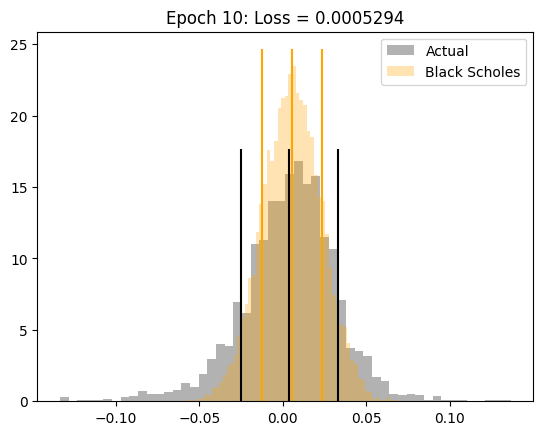

Epoch 11: Loss = 0.0005025
Epoch 12: Loss = 0.0004881
Epoch 13: Loss = 0.0004768
Epoch 14: Loss = 0.0004695
Epoch 15: Loss = 0.0004506
Epoch 16: Loss = 0.0004384
Epoch 17: Loss = 0.0004138
Epoch 18: Loss = 0.0004102
Epoch 19: Loss = 0.0003918
Epoch 20: Loss = 0.0003633


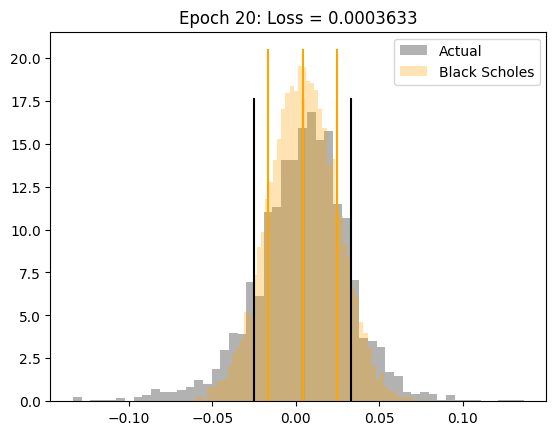

Epoch 21: Loss = 0.0003727
Epoch 22: Loss = 0.0003581
Epoch 23: Loss = 0.0003315
Epoch 24: Loss = 0.0003210
Epoch 25: Loss = 0.0002923
Epoch 26: Loss = 0.0002739
Epoch 27: Loss = 0.0002595
Epoch 28: Loss = 0.0002525
Epoch 29: Loss = 0.0002321
Epoch 30: Loss = 0.0002262


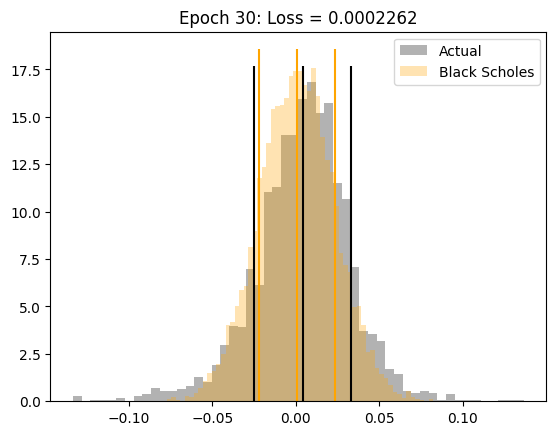

Epoch 31: Loss = 0.0002280
Epoch 32: Loss = 0.0002060
Epoch 33: Loss = 0.0002046
Epoch 34: Loss = 0.0001900
Epoch 35: Loss = 0.0001955
Epoch 36: Loss = 0.0001993
Epoch 37: Loss = 0.0002090
Epoch 38: Loss = 0.0001900
Epoch 39: Loss = 0.0001464
Epoch 40: Loss = 0.0001491


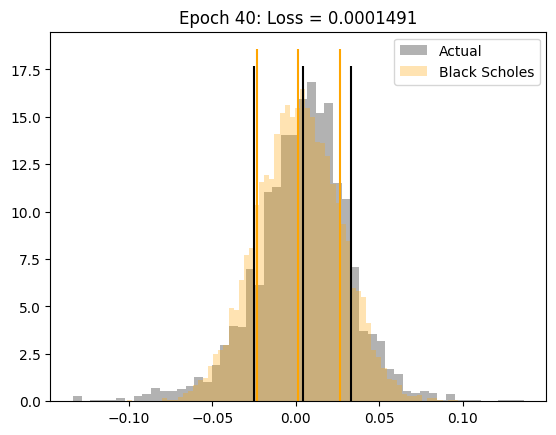

Epoch 41: Loss = 0.0001337
Epoch 42: Loss = 0.0001264
Epoch 43: Loss = 0.0001249
Epoch 44: Loss = 0.0001147
Epoch 45: Loss = 0.0001240
Epoch 46: Loss = 0.0001140
Epoch 47: Loss = 0.0001149
Epoch 48: Loss = 0.0001100
Epoch 49: Loss = nan


In [8]:
train_loop(black_scholes, moment_matching_loss, optimizer, 50)